# Smart search for data science courses

In [17]:
import pinecone
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
import pandas as pd
import config

In [6]:
files = pd.read_csv(r"D:\AI-ML\Vector DB\Files\course_descriptions.csv", encoding = "ANSI")

files.head()

,course_name,course_slug,course_technology,course_description,course_topic,course_description_short
0,Introduction to Tableau,tableau,tableau,Tableau is now one of the most popular busines...,data visualization,Teaching you how to tell compelling stories wi...
1,The Complete Data Visualization Course with Py...,data-visualization,python,The Data Visualization course is designed for ...,data visualization,Teaching you how to master the art of creating...
2,Introduction to R Programming,introduction-to-r-programming,r,R is one of the best programming languages spe...,programming,"Providing you with the skills to manipulate, a..."
3,Data Preprocessing with NumPy,data-preprocessing-numpy,python,This course is designed to show you how to wor...,data processing,This course will guide you through one of Pyth...
4,Introduction to Data and Data Science,intro-to-data-and-data-science,theory,Working with data is an essential part of main...,machine learning,Introducing you to the field of data science a...


In [5]:
def create_course_description(row):
    return f'''The course name is {row["course_name"]}, the slug is {row["course_slug"]},
            the technology is {row["course_technology"]} and the course topic is {row["course_topic"]}'''

In [7]:
pd.set_option('display.max_rows', 106)
files['course_description_new'] = files.apply(create_course_description, axis = 1)
print(files["course_description_new"])

0      The course name is Introduction to Tableau, th...
1      The course name is The Complete Data Visualiza...
2      The course name is Introduction to R Programmi...
3      The course name is Data Preprocessing with Num...
4      The course name is Introduction to Data and Da...
5      The course name is Data Cleaning and Preproces...
6      The course name is Introduction to Business An...
7      The course name is Data Analysis with Excel Pi...
8      The course name is SQL, the slug is sql,\n    ...
9      The course name is Credit Risk Modeling in Pyt...
10     The course name is Python Programmer Bootcamp,...
11     The course name is SQL + Tableau + Python, the...
12     The course name is Introduction to Jupyter, th...
13     The course name is Statistics, the slug is sta...
14     The course name is Mathematics, the slug is ma...
15     The course name is Introduction to Excel, the ...
16     The course name is Probability, the slug is pr...
17     The course name is Start

In [20]:
files.head()

,course_name,course_slug,course_technology,course_description,course_topic,course_description_short,course_description_new
0,Introduction to Tableau,tableau,tableau,Tableau is now one of the most popular busines...,data visualization,Teaching you how to tell compelling stories wi...,"The course name is Introduction to Tableau, th..."
1,The Complete Data Visualization Course with Py...,data-visualization,python,The Data Visualization course is designed for ...,data visualization,Teaching you how to master the art of creating...,The course name is The Complete Data Visualiza...
2,Introduction to R Programming,introduction-to-r-programming,r,R is one of the best programming languages spe...,programming,"Providing you with the skills to manipulate, a...",The course name is Introduction to R Programmi...
3,Data Preprocessing with NumPy,data-preprocessing-numpy,python,This course is designed to show you how to wor...,data processing,This course will guide you through one of Pyth...,The course name is Data Preprocessing with Num...
4,Introduction to Data and Data Science,intro-to-data-and-data-science,theory,Working with data is an essential part of main...,machine learning,Introducing you to the field of data science a...,The course name is Introduction to Data and Da...


## Pinecone Setup

In [9]:
pc = Pinecone(api_key = config.PINECONE_API_KEY, environment = config.PINECONE_ENV)

In [12]:
index_name = "semantic-search"
dimension = 384
metric = "cosine"

In [15]:
pc.create_index(
    name=index_name,
    dimension=dimension,
    metric=metric,
    spec=ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
)

{
    "name": "semantic-search",
    "metric": "cosine",
    "host": "semantic-search-pw4wyt0.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 384,
    "deletion_protection": "disabled",
    "tags": null
}

## Embedding the data 

In [71]:
model = SentenceTransformer("all-MiniLM-L6-v2")
# model = SentenceTransformer('multi-qa-distilbert-cos-v1')

Idea:


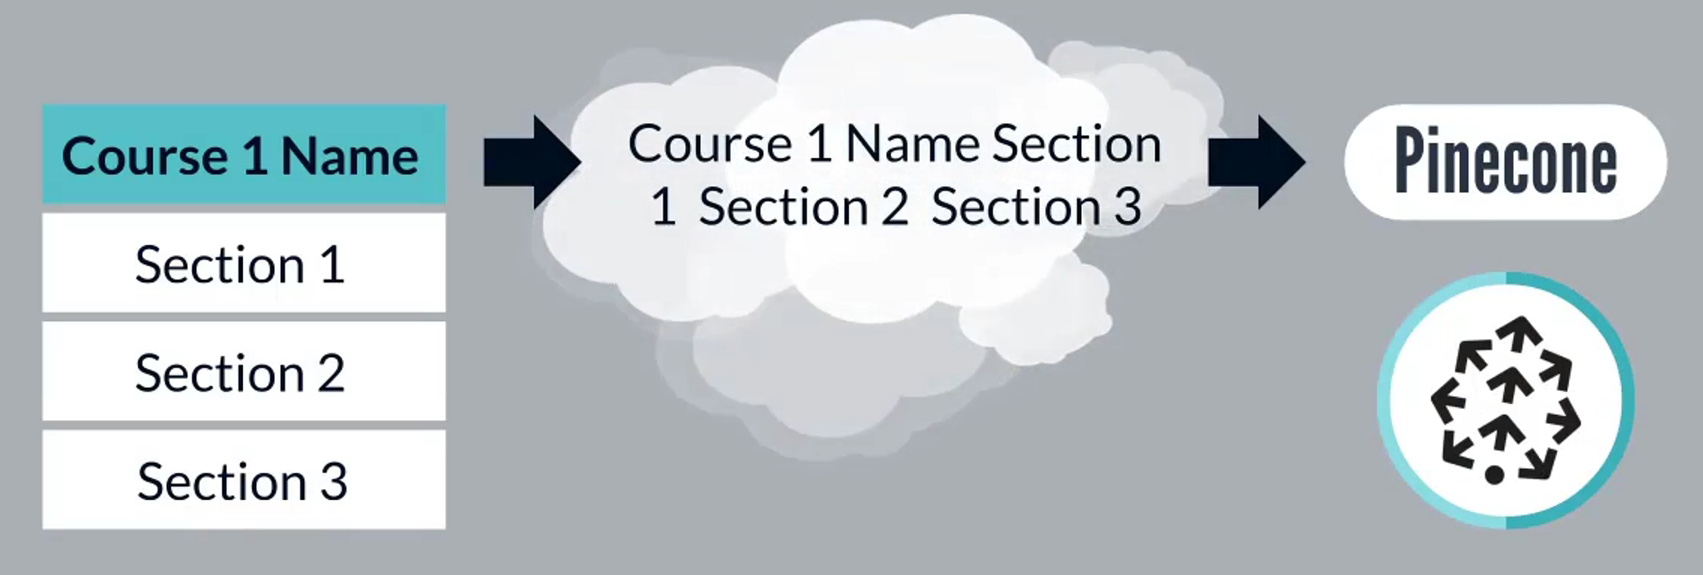

In [64]:
from IPython.display import Image, display
print("Idea:")
display(Image(filename=r"D:\AI-ML\Vector DB\Files\Image.png", width=600))

In [19]:
def create_embeddings(row):
    combined_text = ' '.join([str(row[field]) for field in ['course_description', 'course_description_new', 'course_description_short']])
    embedding = model.encode(combined_text, show_progress_bar = False)
    return embedding

In [21]:
files["embedding"] = files.apply(create_embeddings, axis = 1)

In [24]:
files["embedding"][:10]

0    [0.036368713, -0.027419988, -0.081906594, -0.0...
1    [0.04651035, -0.02039569, -0.018906796, -0.037...
2    [-0.04380702, 0.005933952, -0.088446684, 0.029...
3    [-0.056979496, -0.008179274, -0.039837636, -0....
4    [-0.0214758, 0.020705532, -0.0025892605, 0.023...
5    [-0.060847204, -0.012811531, -0.045933142, -0....
6    [-0.032062028, 0.010643612, -0.09852909, 0.041...
7    [0.00080220745, 0.03923519, -0.068717524, -0.0...
8    [0.028242936, -0.014250816, -0.060806565, 0.06...
9    [-0.007876253, -0.043033715, -0.057259362, 0.0...
Name: embedding, dtype: object

In [25]:
index = pc.Index(index_name)

In [26]:
vectors_to_upsert = [
    (str(row["course_name"]), row["embedding"].tolist())
    for _, row in files.iterrows()
]
index.upsert(vectors = vectors_to_upsert)

print("Data upserted to Pinecone index")

Data upserted to Pinecone index


1. **`files.iterrows()`**
   Goes through the DataFrame **row by row**.
   Each row is like a small dictionary — e.g.:

   ```python
   {"course_name": "Python Basics", "embedding": array([0.12, -0.08, 0.34])}
   ```

2. **`for _, row in files.iterrows()`**
   `_` is just the row number i.e, Index (we don’t need it).
   `row` is the actual data of that row.

3. **`str(row["course_name"])`**
   Takes the course name and converts it to a string (just to be safe).

4. **`row["embedding"].tolist()`**
   Converts the NumPy array of embedding values (like `[0.12, -0.08, 0.34]`) into a normal Python list.

5. **`[(... , ... ) for ... in ...]`**
   This is a *list comprehension* — it builds a list of all those `(id, embedding)` pairs.

---

## Semantic search

In [42]:
# Sample input
query = "python"
query_embedding = model.encode(query, show_progress_bar = False).tolist()

In [39]:
query_results = index.query(
    vector = [query_embedding],
    top_k = 12, 
    include_values = True # Display the values
)

In [40]:
query_results["matches"]

[{'id': 'Introduction to Python',
  'score': 0.618000925,
  'values': [-0.0725384653,
             0.0162975602,
             -0.0496449247,
             0.0584135391,
             -0.0195011329,
             -0.13160421,
             0.00112336397,
             0.0365442969,
             -0.0755860358,
             -0.0167464931,
             -0.0881599635,
             0.0544294,
             0.0430751964,
             -0.0129057271,
             0.0462496132,
             -0.0438655056,
             -0.034420263,
             -0.0180653837,
             0.0340502448,
             -0.103669479,
             -0.00979727134,
             0.0424068756,
             0.0322238058,
             -0.0331607573,
             0.0135259,
             -0.0251015294,
             0.0143530183,
             0.0462914221,
             -0.0281830486,
             -0.0212005433,
             -0.00643571652,
             0.0385154746,
             0.0242174193,
             0.0417555384,
             

In [48]:
score_threshold = 0.3
for match in query_results["matches"]:
    if match['score'] >= score_threshold:
        print(f"Matched item ID: {match['id']}\n\t score: {match['score']}")

Matched item ID: Introduction to Python
	 score: 0.618000925
Matched item ID: Intermediate Python Programming
	 score: 0.576964378
Matched item ID: Introduction to Jupyter
	 score: 0.568439484
Matched item ID: Python Programmer Bootcamp
	 score: 0.558045447
Matched item ID: Machine Learning in Python
	 score: 0.536657333
Matched item ID: Python for Finance
	 score: 0.523757935
Matched item ID: Data Preprocessing with NumPy
	 score: 0.52168566
Matched item ID: Working with Text Files in Python
	 score: 0.491238594
Matched item ID: Customer Analytics in Python
	 score: 0.470789909
Matched item ID: A/B Testing in Python
	 score: 0.445082664
Matched item ID: Credit Risk Modeling in Python
	 score: 0.444033623
Matched item ID: Data Cleaning and Preprocessing with pandas
	 score: 0.441336662


## Similarity search and querying courses and sections data

In [49]:
files = pd.read_csv(r"D:\AI-ML\Vector DB\Files\course_section_descriptions.csv", encoding = "ANSI")

In [50]:
files["unique_id"] = files["course_id"].astype(str) + '-' + files["section_id"].astype(str)

In [52]:
files["metadata"] = files.apply(lambda row: {
    "course_name": row["course_name"],
    "section_name": row["section_name"],
    "section_description": row["section_description"],
}, axis = 1)

files.head()

,course_id,course_name,course_slug,course_description,course_description_short,course_technology,course_topic,course_instructor_quote,section_id,section_name,section_description,unique_id,metadata
0,2,Introduction to Tableau,tableau,Tableau is now one of the most popular busines...,Teaching you how to tell compelling stories wi...,tableau,data visualization,Data scientists don’t just need to deal with d...,9,Introduction to Tableau,While Tableau is an indispensable tool in the ...,2-9,"{'course_name': 'Introduction to Tableau', 'se..."
1,2,Introduction to Tableau,tableau,Tableau is now one of the most popular busines...,Teaching you how to tell compelling stories wi...,tableau,data visualization,Data scientists don’t just need to deal with d...,10,Tableau Functionalities,"In this section, you will create your first Ta...",2-10,"{'course_name': 'Introduction to Tableau', 'se..."
2,2,Introduction to Tableau,tableau,Tableau is now one of the most popular busines...,Teaching you how to tell compelling stories wi...,tableau,data visualization,Data scientists don’t just need to deal with d...,11,The Tableau Exercise,This section is a practical example that will ...,2-11,"{'course_name': 'Introduction to Tableau', 'se..."
3,3,The Complete Data Visualization Course with Py...,data-visualization,The Data Visualization course is designed for ...,Teaching you how to master the art of creating...,python,data visualization,Data visualization is the face of data. Many p...,12,Introduction,"In this section, you will learn about the impo...",3-12,{'course_name': 'The Complete Data Visualizati...
4,3,The Complete Data Visualization Course with Py...,data-visualization,The Data Visualization course is designed for ...,Teaching you how to master the art of creating...,python,data visualization,Data visualization is the face of data. Many p...,13,Setting Up the Environments,"Here, we set up different environments for the...",3-13,{'course_name': 'The Complete Data Visualizati...


In [53]:
def create_embeddings(row):
    combined_text = f'''{row["course_name"]} {row["course_technology"]}
                        {row["course_description"]} {row["section_name"]}{row["section_description"]}'''
    return model.encode(combined_text, show_progress_bar = False)

In [54]:
files["embedding"] = files.apply(create_embeddings, axis = 1)

In [56]:
index_name = "semantic-search-2"
dimension = 384
metric = "cosine"

In [57]:
pc.create_index(
    name = index_name, 
    dimension = dimension, 
    metric = metric, 
    spec = ServerlessSpec(
        cloud = "aws", 
        region = "us-east-1")
    )

{
    "name": "semantic-search-2",
    "metric": "cosine",
    "host": "semantic-search-2-pw4wyt0.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 384,
    "deletion_protection": "disabled",
    "tags": null
}

In [58]:
vectors_to_upsert = [(row["unique_id"], row["embedding"].tolist(), row["metadata"]) for index, row in files.iterrows()]

In [59]:
index.upsert(vectors = vectors_to_upsert)
print("Data succesfully upserted to Pinecone index")

Data succesfully upserted to Pinecone index


In [63]:
query = "regression in Python"
query_embedding = model.encode(query, show_progress_bar=False).tolist()

In [66]:
query_results = index.query(
    vector = [query_embedding],
    top_k = 12,
    include_metadata=True
)

query_results

{'matches': [{'id': '37-369',
              'metadata': {'course_name': 'Machine Learning in Python',
                           'section_description': 'While there are many '
                                                  'libraries that can compute '
                                                  'a regression model, the '
                                                  'most numerically stable one '
                                                  'is sklearn. It is also the '
                                                  'preferred choice of many '
                                                  'machine learning '
                                                  'professionals. In this '
                                                  'section, we implement all '
                                                  'we know about regressions '
                                                  'in this amazing library.',
                           'section_name': 'Li

In [70]:
score_threshold = 0.4
# Assuming query_results are fetched and include metadata
for match in query_results['matches']:
    if match['score'] >= score_threshold:
        course_details = match.get('metadata', {})
        course_name = course_details.get('course_name', 'N/A')
        section_name = course_details.get('section_name', 'N/A')
        section_description = course_details.get('section_description', 'No description available')
        
        print(f"Matched item ID: {match['id']}, Score: {match['score']}")
        print(f"Course: {course_name} \nSection: {section_name} \nDescription: {section_description} \n\n")

Matched item ID: 37-369, Score: 0.753852844
Course: Machine Learning in Python 
Section: Linear Regression with sklearn 
Description: While there are many libraries that can compute a regression model, the most numerically stable one is sklearn. It is also the preferred choice of many machine learning professionals. In this section, we implement all we know about regressions in this amazing library. 


Matched item ID: 36-363, Score: 0.676477492
Course: Python for Finance 
Section: Using Regressions for Financial Analysis 
Description: Understanding rates of return and risk is not all there is about finance. Working with regression analysis is a must, and you will see that Python only helps you to be quicker and more precise when doing such estimations. 


Matched item ID: 37-368, Score: 0.63744539
Course: Machine Learning in Python 
Section: Linear Regression 
Description: In this part of the course, we will discuss what the course covers, why you need to learn advanced statistics, wh